 House Price Statistics:
Mean: 4766729.247706422
Max: 13300000
Min: 1750000

 House Price Statistics:
Mean: 4766729.247706422
Max: 13300000
Min: 1750000


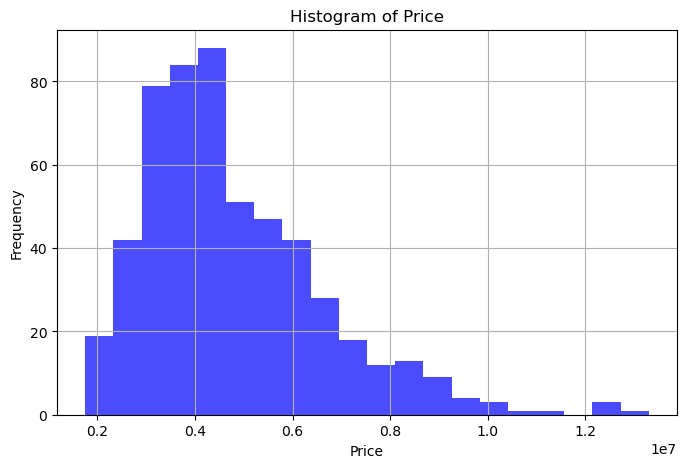

Exiting dashboard...


In [1]:
import threading
import logging
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
logging.basicConfig(filename="data_processing.log", level=logging.INFO, format="%(asctime)s - %(message)s")
@dataclass
class DatasetStats:
    mean: float
    max_value: float
    min_value: float

    def plot_histogram(self, column, df):
        """Plots a histogram of a specified column."""
        plt.figure(figsize=(8, 5))
        plt.hist(df[column], bins=20, color='blue', alpha=0.7)
        plt.xlabel(column.capitalize())
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {column.capitalize()}")
        plt.grid(True)
        plt.show()
def process_file(file_path, column):
    logging.info(f"Starting processing for {file_path}")
    df = pd.read_csv(file_path)
    
    if column not in df.columns:
        logging.error(f"Column '{column}' not found in {file_path}")
        return None
    
    mean_value = df[column].mean()
    max_value = df[column].max()
    min_value = df[column].min()

    logging.info(f"Completed processing for {file_path}")
    
    return DatasetStats(mean_value, max_value, min_value), df
file_path = "C:\\Users\\sures\\OneDrive\\Desktop\\P1L5\\Housing_Price_Data.csv"
column_name = "price"
thread = threading.Thread(target=process_file, args=(file_path, column_name))
thread.start()
thread.join()
stats, df = process_file(file_path, column_name)
print(f" House Price Statistics:\nMean: {stats.mean}\nMax: {stats.max_value}\nMin: {stats.min_value}")
while True:
    user_input = input("\nType 'stats' to view statistics or 'plot' to see a histogram of prices (or 'exit' to quit): ").strip().lower()
    if user_input == "stats":
        print(f"\n House Price Statistics:\nMean: {stats.mean}\nMax: {stats.max_value}\nMin: {stats.min_value}")
    elif user_input == "plot":
        stats.plot_histogram(column_name, df)
    elif user_input == "exit":
        print("Exiting dashboard...")
        break
    else:
        print("Invalid input. Please type 'stats', 'plot', or 'exit'.")